<h1>The Fast Fourier Transform</h1>

The Fast Fourier Transform (FFT) is a highly efficient algorithm designed to simplify the computation of the Discrete Fourier Transform (DFT). It accomplishes this by significantly reducing the computational complexity from O($n^2$) to O($n \log n$), where $n$ represents the data size. This reduction in complexity is especially impactful when dealing with large datasets, as it substantially decreases the time required for computation.

Exploiting the symmetries in the DFT is the critical aspect of the FFT algorithm. This is the DFT equation:

$$\Large X_k = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{i2\pi}{N}kn}$$

From This, we can calculate:

$$\Large X_{k+N}=\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi(k+N)n/N}=\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi n}\cdot e^{-i2\pi kn/N}$$

Since $e^{-i2\pi n}=1$, we can rewrite

$$\Large X_{k+N}=\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi kn/N}=X_k$$

which means that we have symmetries within the DFT. These can be used to optimize the algorithm.

## Divide and conquer algorithm

Cooley and Tukey revolutionized the DFT computation by splitting it into two smaller components. This innovative technique harnesses the core definition of the DFT and has had a profound impact on signal processing and data analysis.

\begin{equation*}
    \begin{split}
        \Large X_k 
        &= \Large\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi kn / N}\\
        &= \Large\sum_{m=0}^{N/2-1}x_{2m}\cdot e^{-i2\pi k(2m) / N} 
        + \sum_{m=0}^{N/2-1}x_{2m+1}\cdot e^{-i2\pi k(2m+1) / N}\\
        &= \Large \sum_{m=0}^{N/2-1}x_{2m}\cdot e^{-i2\pi km / (N/2)} 
        + e^{-i2\pi k / N}\sum_{m=0}^{N/2-1}x_{2m+1}\cdot e^{-i2\pi km / (N/2)}\\
    \end{split}
\end{equation*}

With this, the Discrete Fourier transform has been split into odd-numbered values and even-numbered values. Each term consists of $(N/2)∗N$ computations, for a total of $N^2$.

We know that the range of k is $0≤k<N$ and the range of $n$ is $0≤n<M≡N/2$. Observing the symmetry that is created, we realize only half the computations are necessary for each sub-problem. With this, the $O[N^2]$ computation has become $O[M^2]$, with $M$ half the size of $N$.

This divide-and-conquer algorithm can be reimplemented as need, halving the computational cost each time, until our arrays are too small to continue. In the limit of this process, this recursive approach reaches a computational value of $O[NlogN]$.

## Example of FFT

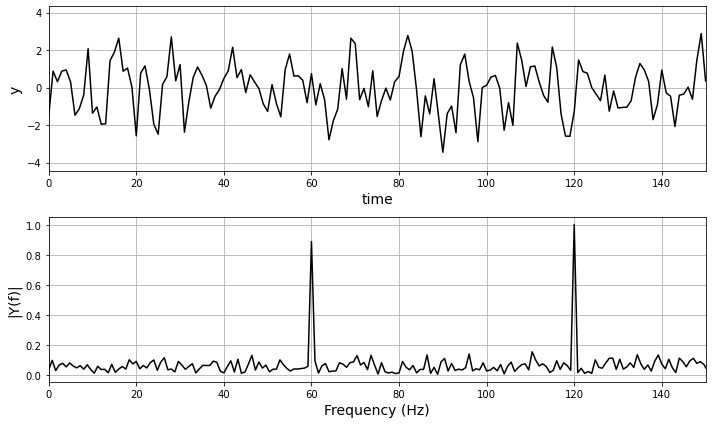

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data
Fs = 800                           # Sampling frequency
T = 1 / Fs                         # Sample time
N = 1000                           # Length of signal
t = np.arange(0, N) * T            # Time vector

# Sum of a 60 Hz sinusoid and a 120 Hz sinusoid
x = 0.8*np.sin(2 * np.pi * 60 * t) + np.sin(2 * np.pi * 120 * t)
y = x + 1 * np.random.randn(N)                                             # Sinusoids plus noise

# Plot of the signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(Fs * t, y,'-k')
plt.ylabel('y', fontsize=14)
plt.xlabel('time', fontsize=14)
plt.xlim([0, 150])
plt.grid(True)

# Fast Fourier Transform
C = np.fft.fft(y)                              # complex fft coefficients
n = N // 2 + 1                                 # number of "useful" fft output elements
f = Fs / 2 * np.linspace(0, 1, n)              # frequencies vector for signal in frequency domain [Hz]
amplitude = 2 / N * np.abs(C[:n])              # amplitude in frequency spectrum

# Plot of the signal spectrum
plt.subplot(2, 1, 2)
plt.plot(f, amplitude,'-k')
plt.xlabel('Frequency (Hz)', fontsize=14)
plt.ylabel('|Y(f)|', fontsize=14)
plt.xlim([0, 150])
plt.grid(True)

plt.tight_layout()
plt.show()
